In [22]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [23]:
experiment_name = 'budget_scale'
experiment_summary_path = os.path.join("experiments", f"{experiment_name}.csv")
df = pd.read_csv(experiment_summary_path)

df.head()

,filename,actual_num_epochs,lr,ss_tau,sm_tau,batch_size,reg_lambda,epochs,early_stopping,data_seed,...,baseline_w_1,baseline_w_2,baseline_w_3,baseline_w_4,baseline_w_bias,linesearch_baseline_best_bias,linesearch_baseline_min_bias,linesearch_baseline_max_bias,linesearch_baseline_test_acc,linesearch_baseline_price
0,70351379,100,0.001,0.001,0.01,500,0.1,100,NaN,1,...,2.129329,0.630250,1.229617,1.581784,-2.150299,-2.757576,-3,3,0.719432,4.774909
1,70351384,100,0.001,0.001,0.01,500,0.1,100,NaN,6,...,2.125210,0.630027,1.248381,1.591907,-2.147873,-2.696970,-3,3,0.752410,6.699324
2,70351363,100,0.001,0.001,0.01,500,0.1,100,NaN,5,...,2.166933,0.604098,1.272476,1.576049,-2.197398,-2.878788,-3,3,0.716388,3.880489
3,70351359,100,0.001,0.001,0.01,500,0.1,100,NaN,1,...,2.129329,0.630250,1.229617,1.581784,-2.150299,-2.757576,-3,3,0.703957,3.951162
4,70351367,100,0.001,0.001,0.01,500,0.1,100,NaN,9,...,2.119355,0.623036,1.322741,1.545406,-2.182201,-2.757576,-3,3,0.726535,4.921362


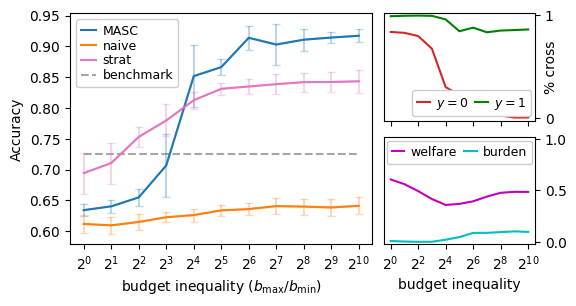

In [26]:
SAVE = True
path = 'graphics'
fname = 'adult'

# Normalize welfare and burden
df['test_welfare_normalized'] = df['test_welfare_last'] / df['test_total_budget']
df['test_burden_normalized'] = df['test_burden_last'] / df['test_pos_total_budget']
df['baseline_welfare_normalized'] = df['baseline_test_welfare'] / df['test_total_budget']
df['baseline_burden_normalized'] = df['baseline_test_burden'] / df['test_pos_total_budget']

# Group by 'budget_scale_max' and calculate the mean and standard deviation
grouped_mean_df = df.groupby('budget_scale_max').mean()
grouped_std_df = df.groupby('budget_scale_max').std()

# Create a 2x2 grid
fig = plt.figure(figsize=(6, 3))
gs = gridspec.GridSpec(2, 2, figure=fig, width_ratios=[4, 2], hspace=0.15, wspace=0.05)

# Plot 'test_acc_last' and 'baseline_test_acc' on the left
ax1 = fig.add_subplot(gs[:, 0])
ax1.plot(grouped_mean_df.index, grouped_mean_df['test_acc_last'], 
             label='MASC', c='tab:blue')
ax1.errorbar(grouped_mean_df.index, grouped_mean_df['test_acc_last'], 
             yerr=grouped_std_df['test_acc_last'],
             capsize=3, c='tab:blue', alpha=0.3)

ax1.plot(grouped_mean_df.index, grouped_mean_df['baseline_test_acc'], 
             label='naive', c='tab:orange')
ax1.errorbar(grouped_mean_df.index, grouped_mean_df['baseline_test_acc'], 
             yerr=grouped_std_df['baseline_test_acc'], 
             capsize=3, c='tab:orange', alpha=0.3)

ax1.plot(grouped_mean_df.index, grouped_mean_df['linesearch_baseline_test_acc'],
             label='strat', c='tab:pink')
ax1.errorbar(grouped_mean_df.index, grouped_mean_df['linesearch_baseline_test_acc'],
             yerr=grouped_std_df['linesearch_baseline_test_acc'],
             capsize=3, c='tab:pink', alpha=0.3)

ax1.plot(grouped_mean_df.index, grouped_mean_df['baseline_naive_test_acc'],
             label='benchmark', c='grey', linestyle='--', alpha=0.7, zorder=-1)
# ax1.errorbar(grouped_mean_df.index, grouped_mean_df['baseline_naive_test_acc'],
             # yerr=grouped_std_df['baseline_naive_test_acc'],
             # capsize=3, c='grey', alpha=0.3)

# ax1.set_title('Validation Accuracy vs Baseline Validation Accuracy')
ax1.set_xlabel(r'budget inequality ($b_{\max}/b_{\min}$)')
ax1.set_ylabel('Accuracy')
ax1.legend(markerscale=0.8, handlelength=1.2, handletextpad=0.5, framealpha=1,
           labelspacing=0.15, columnspacing=0.6, fontsize=9,
           loc='upper left')
ax1.set_xscale('log', base=2)
ax1.set_xticks([2**i for i in range(11)])
# ax1.grid(True)

# Plot 'test_neg_stayed_last' and 'test_pos_moved_last' on the bottom right
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(grouped_mean_df.index, grouped_mean_df['test_tn_moved_last']+ grouped_mean_df['test_fp_last'], 
             # yerr=grouped_std_df['test_neg_stayed_last'], 
             label=r'$y=0$',
             color='tab:red') #, marker='o', capsize=5)
ax2.plot(grouped_mean_df.index, grouped_mean_df['test_fn_moved_last'] ,
             # yerr=grouped_std_df['test_pos_moved_last'], 
             label=r'$y=1$',
             color='g') #, marker='o', capsize=5)
# ax2.set_title('Test Negative Stayed vs Test Positive Moved')
ax2.set_ylim([-0.02,1.02])
# ax2.set_xlabel('Budget Scale')
ax2.set_ylabel('% cross')
ax2.set_yticks([0,1])
ax2.legend(ncols=2, markerscale=0.8, handlelength=1., handletextpad=0.5, framealpha=1,
           labelspacing=0.15, columnspacing=0.6, fontsize=9,
           loc='lower center', bbox_to_anchor=(0.58, -0.02))
           # loc='center left', bbox_to_anchor=(-0.15, 0.62))
ax2.set_xscale('log', base=2)
ax2.set_xticks([2**i for i in np.arange(0,11,2)])
ax2.set_xticklabels([])
# ax2.grid(True)
# ax2.yaxis.set_label_position("right")
ax2.yaxis.set_label_coords(1.15, 0.5)
ax2.yaxis.tick_right()

# Plot 'test_welfare_last' and 'test_burden_last' on the top right
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(grouped_mean_df.index, grouped_mean_df['test_welfare_normalized'],
             # yerr=grouped_std_df['test_welfare_normalized'],
             label='welfare',
             color='m') #, marker='o', capsize=5)
ax3.plot(grouped_mean_df.index, grouped_mean_df['test_burden_normalized'],
             # yerr=grouped_std_df['test_burden_normalized'],
             label='burden',
             color='c') #, marker='o', capsize=5)
# ax3.errorbar(grouped_mean_df.index, grouped_mean_df['baseline_welfare_normalized'],
#              # yerr=grouped_std_df['baseline_welfare_normalized'],
#              label='Welfare (Normalized)',
#              color='m') #, marker='o', capsize=5)
# ax3.plot(grouped_mean_df.index, grouped_mean_df['baseline_burden_normalized'],
#              # yerr=grouped_std_df['baseline_burden_normalized'],
#              label='Burden (Normalized)',
#              color='m') #, marker='o', capsize=5)
# ax3.set_title('Validation Welfare vs Validation Burden')
ax3.set_xlabel(r'budget inequality')
ax3.set_ylim([-0.02,1.02])
# ax3.set_ylabel('Value')
ax3.legend(ncols=2, markerscale=0.8, handlelength=1., handletextpad=0.5, framealpha=1,
           labelspacing=0.15, columnspacing=0.6, fontsize=9,
           loc='upper center', bbox_to_anchor=(0.5, 1.02))
ax3.set_xscale('log', base=2)
ax3.set_xticks([2**i for i in np.arange(0,11,2)])
# ax3.grid(True)
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()

if SAVE:
    plt.savefig(os.path.join(path, f'{fname}.pdf'), format='pdf', bbox_inches='tight')
    plt.savefig(os.path.join(path, f'{fname}.png'), format='png', bbox_inches='tight')
else:
    plt.show()